In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import tensorflow as tf
from sklearn import preprocessing # one-hot-encoding
import matplotlib.pyplot as plt  # plot 
from sklearn.model_selection import train_test_split, KFold, cross_val_score #  kflod validation
from keras.models import Sequential # model 
from keras.layers import Dense, Dropout  # dropout
from sklearn.model_selection import train_test_split # 划分数据集
from sklearn import metrics # 评估模型
from sklearn.metrics import confusion_matrix # 混淆矩阵

Using TensorFlow backend.


In [2]:
#　查看是否在使用gpu进行训练
tf.test.is_gpu_available()

False

In [3]:
#　查看使用的是哪一个虚拟环境
!which python

/home/mastlab-zl/anaconda3/envs/tf-cpu/bin/python


In [4]:
# 准备数据
df = pd.read_csv('output_normalized_cmu.csv', header=0)
seed = 42

In [5]:
# x为36维特征
x = df.loc[:, :'17_y'].astype(float)
# y为动作种类（标签）
y = df.loc[:,['type_index'] ]
# 将动作类别字段转换为one-hot-encoding
encoder =  preprocessing.LabelBinarizer()
dummy_y = encoder.fit_transform(y)
labels_name = ['Stand', 'Wave', 'Flap', 'Squat', 'Bowling']

In [6]:
y

,type_index
0,0
1,0
2,0
3,0
4,0
...,...
2190,4
2191,4
2192,4
2193,4


In [7]:
dummy_y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [8]:
# 划分数据集
x_temp,x_test,y_temp,y_test = train_test_split(x, dummy_y, test_size=0.2, random_state=seed) # 第一次划分，划分出20%为测试集：x_test, y_test
x_train, x_validation, y_train, y_validation = train_test_split(x_temp, y_temp, test_size=0.25, random_state=seed) # 第二次划分，划分出60%的训练集和20%的验证集
print('训练集大小:', len(x_train),  '验证集大小:', len(x_validation),  '测试集大小:', len(x_test))

训练集大小: 1317 验证集大小: 439 测试集大小: 439


In [9]:
# # 导出划分好的训练集、验证集和测试集
# train= np.column_stack((x_train,y_train))
# np.savetxt('DNN_train_set.csv',train, delimiter = ',')

# validation = np.column_stack((x_validation,y_validation))
# np.savetxt('DNN_validation_set.csv',validation, delimiter = ',')

# test = np.column_stack((x_test, y_test))
# np.savetxt('DNN_test_set.csv', test, delimiter = ',')

In [10]:
# 定义模型
model = Sequential()
model.add(Dense(input_dim=36, activation="relu", units=16))
# model.add(Dropout(0.2))
model.add(Dense(units=8, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=16, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(activation="softmax", units=5))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [12]:
# 拟合模型
train_history = model.fit(x_train, y_train,  validation_data=(x_validation, y_validation), batch_size=32, epochs=100, shuffle=True, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1317 samples, validate on 439 samples
Epoch 1/100





 - 1s - loss: 1.5642 - acc: 0.2012 - val_loss: 1.5570 - val_acc: 0.2460
Epoch 2/100
 - 0s - loss: 1.5065 - acc: 0.3166 - val_loss: 1.4935 - val_acc: 0.4237
Epoch 3/100
 - 0s - loss: 1.4452 - acc: 0.4062 - val_loss: 1.4341 - val_acc: 0.5011
Epoch 4/100
 - 0s - loss: 1.3646 - acc: 0.5604 - val_loss: 1.3640 - val_acc: 0.6241
Epoch 5/100
 - 0s - loss: 1.2745 - acc: 0.6325 - val_loss: 1.2636 - val_acc: 0.5740
Epoch 6/100
 - 0s - loss: 1.1636 - acc: 0.5976 - val_loss: 1.1338 - val_acc: 0.6674
Epoch 7/100
 - 0s - loss: 1.0353 - acc: 0.6849 - val_loss: 1.0327 - val_acc: 0.6560
Epoch 8/100
 - 0s - loss: 0.9343 - acc: 0.6948 - val_loss: 0.9331 - val_acc: 0.6879
Epoch 9/100
 - 0s - loss: 0.8431 - acc: 0.8125 - val_loss: 0.8424 - val_acc: 0.7927
Epoch 10/100
 - 0s - loss: 0.7559 - acc: 0.8573 - val_loss: 0.7590 - val_acc: 0.8292
Epoch 11/1

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                592       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 45        
Total params: 773
Trainable params: 773
Non-trainable params: 0
_________________________________________________________________


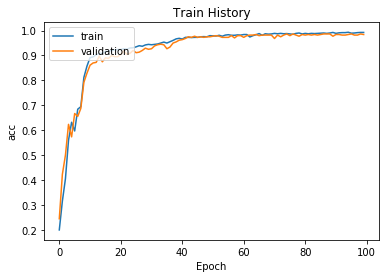

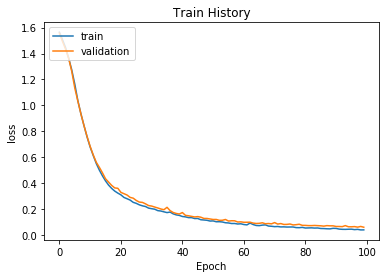

In [14]:
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [15]:
# 在test_set上测试
eval = model.evaluate(x_test, y_test, verbose=0)
print("Evaluation on test data: loss = %0.6f accuracy = %0.3f%% \n"  % (eval[0], eval[1] * 100) )

Evaluation on test data: loss = 0.040999 accuracy = 99.317% 



In [16]:
# 评估模型
y_pred = encoder.inverse_transform(model.predict(x_test))
y_true = encoder.inverse_transform(y_test)
print(metrics.classification_report(y_true, y_pred, digits=4, target_names=labels_name))

              precision    recall  f1-score   support

       Stand     0.9820    1.0000    0.9909       109
        Wave     1.0000    1.0000    1.0000        89
        Flap     0.9894    1.0000    0.9947        93
       Squat     1.0000    1.0000    1.0000        88
     Bowling     1.0000    0.9500    0.9744        60

    accuracy                         0.9932       439
   macro avg     0.9943    0.9900    0.9920       439
weighted avg     0.9933    0.9932    0.9931       439



In [17]:
# 绘制混淆矩阵
def plot_Matrix(cm, classes, title=None,  cmap=plt.cm.Blues):
    plt.rc('font',family='Times New Roman',size='8')   # 设置字体样式、大小
    
    # 按行进行归一化
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
    str_cm = cm.astype(np.str).tolist()
    for row in str_cm:
        print('\t'.join(row))
    # 占比1%以下的单元格，设为0，防止在最后的颜色中体现出来
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if int(cm[i, j]*100 + 0.5) == 0:
                cm[i, j]=0

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    # ax.figure.colorbar(im, ax=ax) # 侧边的颜色条带
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Actual',
           xlabel='Predicted')

    # 通过绘制格网，模拟每个单元格的边框
    ax.set_xticks(np.arange(cm.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(cm.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # 将x轴上的lables旋转45度
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # 标注百分比信息
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if int(cm[i, j]*100 + 0.5) > 0:
                ax.text(j, i, format(int(cm[i, j]*100 + 0.5) , fmt) + '%',
                        ha="center", va="center",
                        color="white"  if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.savefig('cm.png', dpi=300)
    plt.show()
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[109   0   0   0   0]
 [  0  89   0   0   0]
 [  0   0  93   0   0]
 [  0   0   0  88   0]
 [  2   0   1   0  57]]


Normalized confusion matrix
1.0	0.0	0.0	0.0	0.0
0.0	1.0	0.0	0.0	0.0
0.0	0.0	1.0	0.0	0.0
0.0	0.0	0.0	1.0	0.0
0.03333333333333333	0.0	0.016666666666666666	0.0	0.95


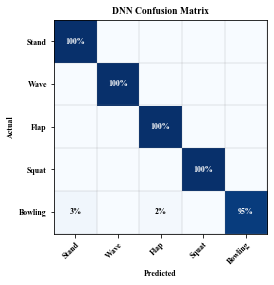

In [18]:
plot_Matrix(cm, labels_name, "DNN Confusion Matrix")

In [19]:
# 导出模型
# model.save('dnn_model.h5')  

In [20]:
input =  [0.42, 0.0, 0.33, 0.14, 0.17, 0.14, 0.08, 0.31, 0.0, 0.48, 0.5, 0.14, 0.75, 0.1, 1.0, 0.03, 0.25, 0.48, 0.25, 0.76, 0.17, 1.0, 0.42, 0.48, 0.42, 0.76, 0.42, 1.0, 0.33, 0.0, 0.42, 0.0, 0.25, 0.0, 0.42, 0.03]
input  = np.array(input).reshape((1, 36))
pred_output  =  encoder.inverse_transform(model.predict(input))
print(pred_output)

[2]
